In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd # 판다스 임포트

# 데이터 경로
data_path = '/content/drive/MyDrive/ solar power/'

train = pd.read_csv(data_path + 'train/train.csv') # 훈련 데이터
submission = pd.read_csv(data_path + 'sample_submission.csv') # 제출 샘플 데이터

In [15]:
train.head()

,Day,DHI,DNI,WS,RH,T,TARGET,Time
0,0,0,0,1.5,69.08,-12,0.0,0.0
1,0,0,0,1.5,69.06,-12,0.0,0.5
2,0,0,0,1.6,71.78,-12,0.0,1.0
3,0,0,0,1.6,71.75,-12,0.0,1.5
4,0,0,0,1.6,75.20,-12,0.0,2.0


In [9]:
train['Time'] = train['Hour'] + train['Minute']/60

In [13]:
drop_features = ['Hour', 'Minute']
train = train.drop(drop_features, axis=1)

In [14]:
train.head()

,Day,DHI,DNI,WS,RH,T,TARGET,Time
0,0,0,0,1.5,69.08,-12,0.0,0.0
1,0,0,0,1.5,69.06,-12,0.0,0.5
2,0,0,0,1.6,71.78,-12,0.0,1.0
3,0,0,0,1.6,71.75,-12,0.0,1.5
4,0,0,0,1.6,75.20,-12,0.0,2.0


In [17]:
train['Cos'] = np.cos(2*np.pi*(train['Time']/24))
train['Sin'] = np.sin(2*np.pi*(train['Time']/24))

In [18]:
train.head()

,Day,DHI,DNI,WS,RH,T,TARGET,Time,Cos,Sin
0,0,0,0,1.5,69.08,-12,0.0,0.0,1.000000,0.000000
1,0,0,0,1.5,69.06,-12,0.0,0.5,0.991445,0.130526
2,0,0,0,1.6,71.78,-12,0.0,1.0,0.965926,0.258819
3,0,0,0,1.6,71.75,-12,0.0,1.5,0.923880,0.382683
4,0,0,0,1.6,75.20,-12,0.0,2.0,0.866025,0.500000


In [37]:
b = 17.62
c = 243.12
r = np.log(train['RH']/100)+((b*train['T'])/(c+train['T']))
train['Td'] = (c*r)/(b-r)

In [42]:
train.head()

,Day,DHI,DNI,WS,RH,T,TARGET,Time,Cos,Sin,Td
0,0,0,0,1.5,69.08,-12,0.0,0.0,1.000000,0.000000,-16.522271
1,0,0,0,1.5,69.06,-12,0.0,0.5,0.991445,0.130526,-16.525742
2,0,0,0,1.6,71.78,-12,0.0,1.0,0.965926,0.258819,-16.061776
3,0,0,0,1.6,71.75,-12,0.0,1.5,0.923880,0.382683,-16.066807
4,0,0,0,1.6,75.20,-12,0.0,2.0,0.866025,0.500000,-15.500215


In [47]:
train.describe()

,Day,DHI,DNI,WS,RH,T,TARGET,Time,Cos,Sin,Td
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,5.256000e+04,5.256000e+04,52560.000000
mean,547.000000,64.344121,234.792371,2.456033,56.793102,9.279928,17.790630,11.750000,-4.175588e-17,1.365388e-17,-0.286467
std,316.102148,103.897125,349.684583,1.426874,22.052875,10.179741,25.759955,6.926765,7.071135e-01,7.071135e-01,7.702938
min,0.000000,0.000000,0.000000,0.000000,7.590000,-19.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,-26.075522
25%,273.000000,0.000000,0.000000,1.400000,39.697500,1.000000,0.000000,5.875000,-7.071068e-01,-7.071068e-01,-5.732826
50%,547.000000,0.000000,0.000000,2.200000,57.600000,9.000000,0.000000,11.750000,-6.123234e-17,6.123234e-17,-0.662582
75%,821.000000,87.000000,469.000000,3.200000,72.770000,17.000000,32.089890,17.625000,7.071068e-01,7.071068e-01,5.790448
max,1094.000000,528.000000,1059.000000,12.000000,100.000000,35.000000,99.913939,23.500000,1.000000e+00,1.000000e+00,17.220399


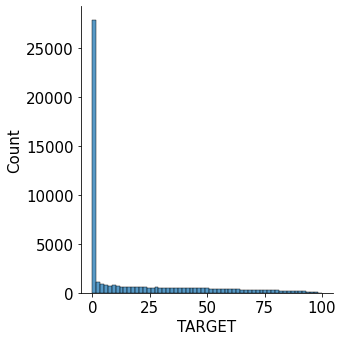

In [45]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=15)      # 폰트 크기를 15로 설정 
sns.displot(train['TARGET']); # 분포도 출력

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


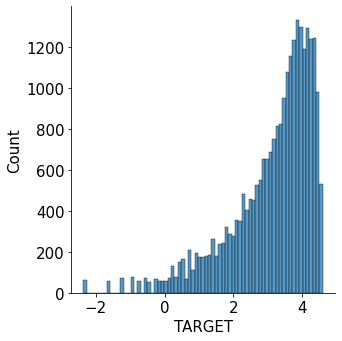

In [46]:
sns.displot(np.log(train['TARGET']));

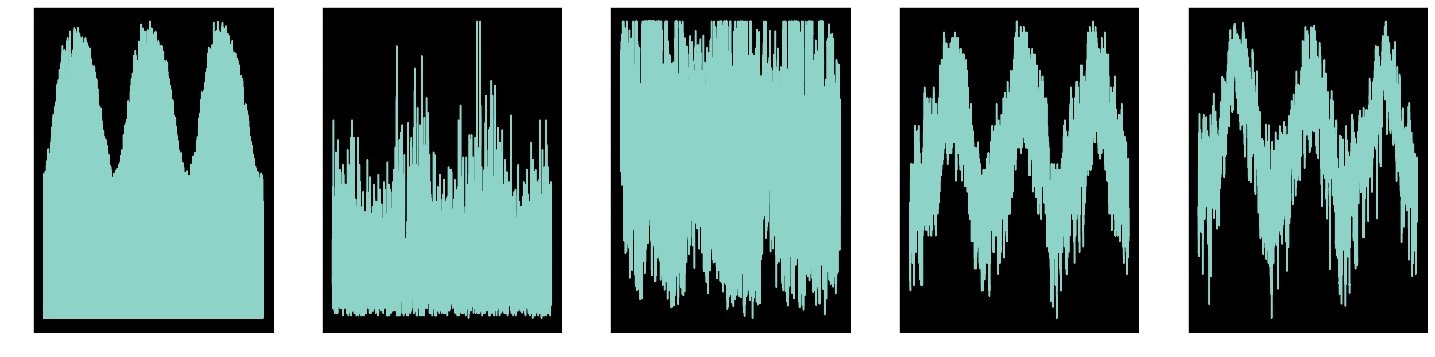

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(151)
plt.plot(train['Day'], train['TARGET'], label='TARGET')
plt.subplot(152)
plt.plot(train['Day'], train['WS'], label='WS')
plt.subplot(153)
plt.plot(train['Day'], train['RH'], label='RH')
plt.subplot(154)
plt.plot(train['Day'], train['T'], label='T')
plt.subplot(155)
plt.plot(train['Day'], train['Td'], label='Td')
plt.gcf().set_size_inches(25, 6)


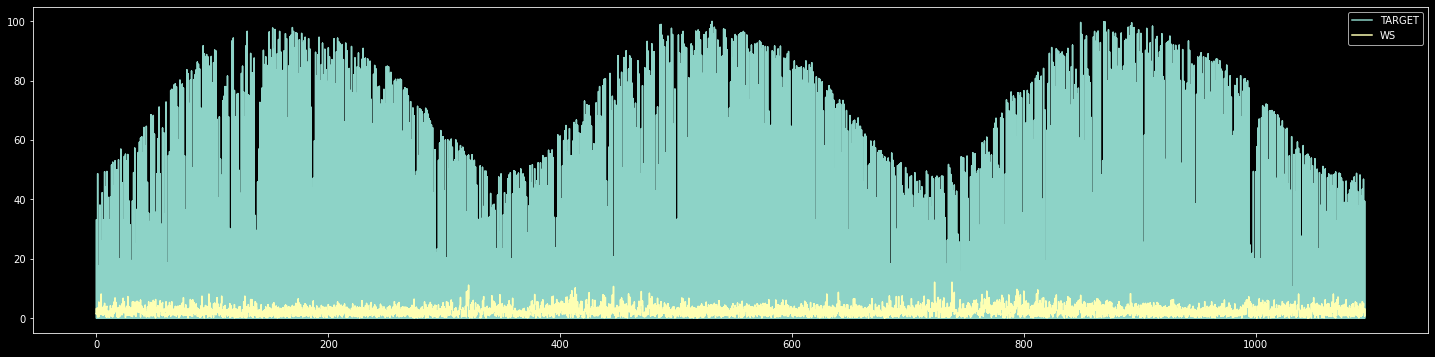

In [71]:
# ▶ Zone1, 2, 3 전력 발전량 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(train['Day'], train['TARGET'], label='TARGET')
plt.plot(train['Day'], train['WS'], label='WS')
plt.legend()
plt.gcf().set_size_inches(25, 6)

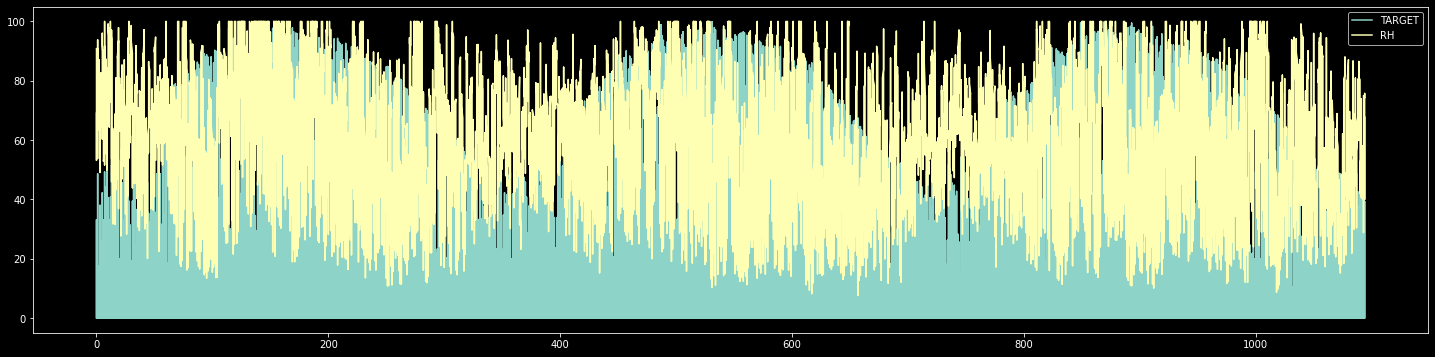

In [55]:
plt.style.use(['dark_background'])
plt.plot(train['Day'], train['TARGET'], label='TARGET')
plt.plot(train['Day'], train['RH'], label='RH')
plt.legend()
plt.gcf().set_size_inches(25, 6)

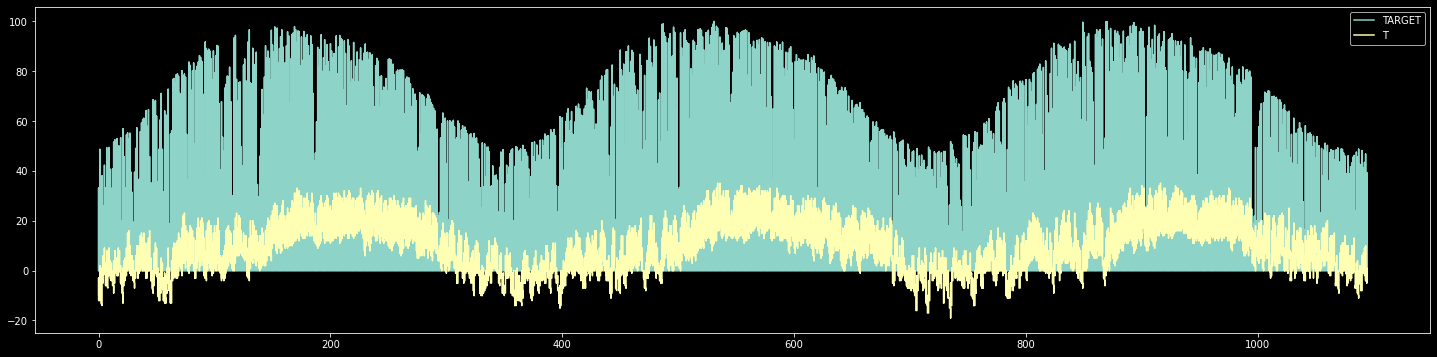

In [56]:
# TARGET과 T는 비례
plt.style.use(['dark_background'])
plt.plot(train['Day'], train['TARGET'], label='TARGET')
plt.plot(train['Day'], train['T'], label='T')
plt.legend()
plt.gcf().set_size_inches(25, 6)

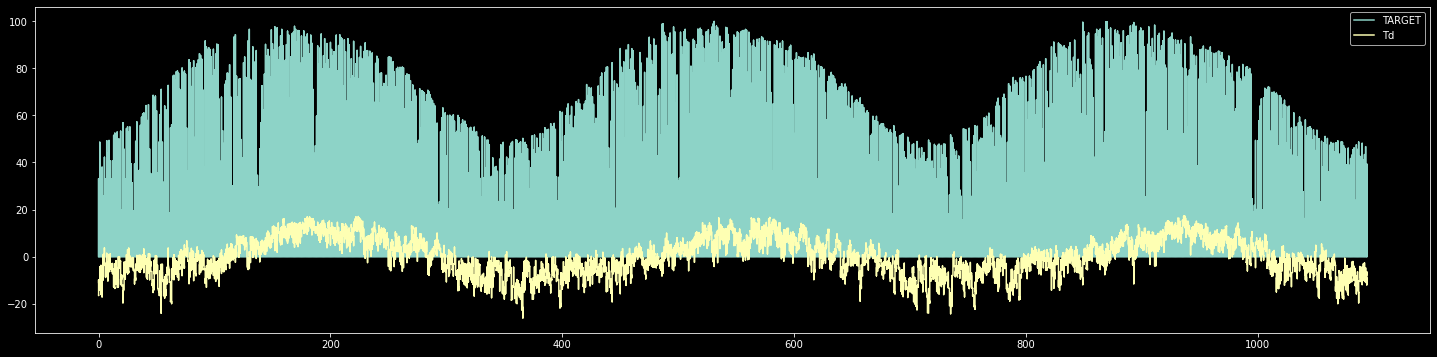

In [61]:
# TARGET과 Td는 비례
plt.style.use(['dark_background'])
plt.plot(train['Day'], train['TARGET'], label='TARGET')
plt.plot(train['Day'], train['Td'], label='Td')
plt.legend()
plt.gcf().set_size_inches(25, 6)

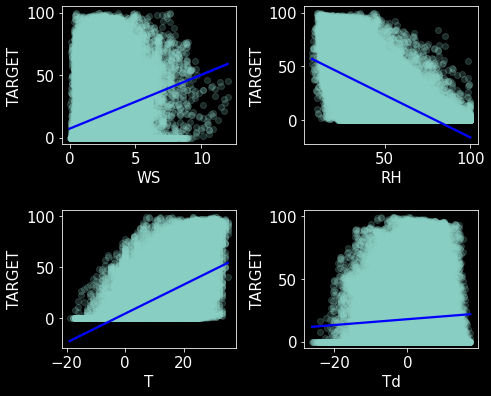

In [65]:
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(7, 6)

sns.regplot(x='WS', y='TARGET', data=train, ax=axes[0, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='RH', y='TARGET', data=train, ax=axes[0, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='T', y='TARGET', data=train, ax=axes[1, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='Td', y='TARGET', data=train, ax=axes[1, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

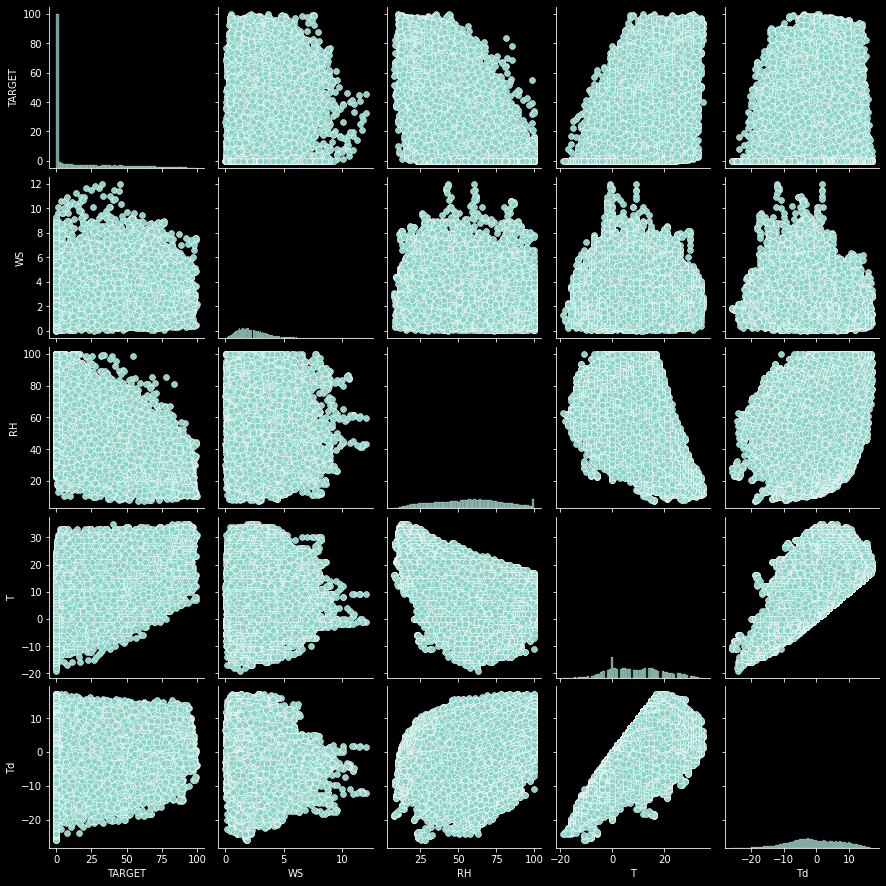

In [79]:
df_pair = train[['TARGET', 'WS', 'RH', 'T', 'Td']]
plt.style.use(['dark_background'])
sns.pairplot(df_pair)
plt.show()

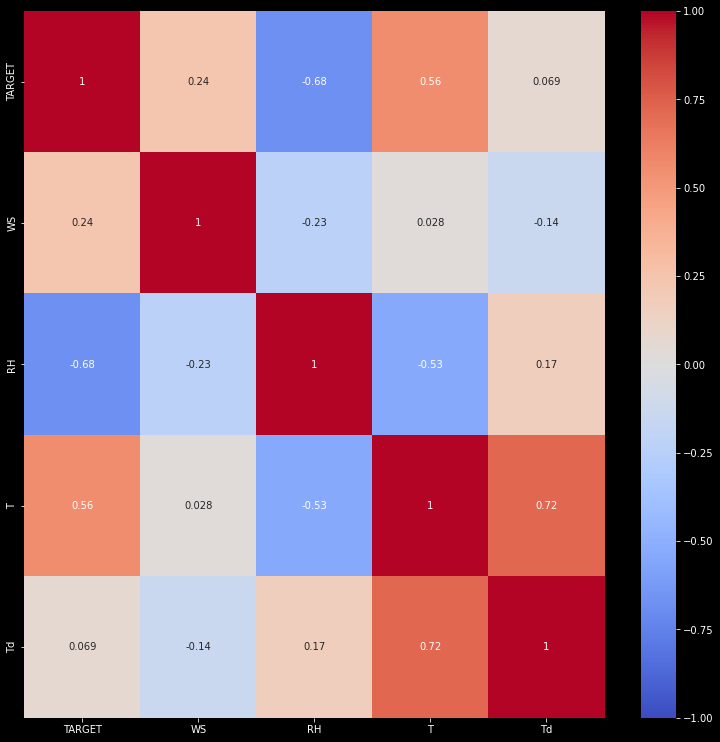

In [80]:
plt.gcf().set_size_inches(13, 13)
sns.heatmap(df_pair.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');